In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
import pylab
import plotly as py

# Описание датасета.
## Датасет содержит информацию о публичных школах Бостона за учебный год 2018-2019. Обновлен в Сентябре 2018 года. Можно найти на https://www.kaggle.com/crawford/boston-public-schools

# Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий (либо если такой датасет вам найти сложно, придётся разные датасеты для разных пунктов задания использовать)

In [7]:
data = pd.read_csv('Public_Schools.csv', index_col = 'OBJECTID_1')

In [27]:
data.head()

,X,Y,OBJECTID,BLDG_ID,BLDG_NAME,ADDRESS,CITY,ZIPCODE,CSP_SCH_ID,SCH_ID,SCH_NAME,SCH_LABEL,SCH_TYPE,SHARED,COMPLEX,POINT_X,POINT_Y
OBJECTID_1,,,,,,,,,,,,,,,,,
1,-71.004121,42.388799,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,,,790128.152748,2.967094e+06
2,-71.030480,42.378545,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,,,783027.745829,2.963318e+06
3,-71.033891,42.375279,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,,,782112.823908,2.962122e+06
4,-71.038011,42.378089,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,4543,O'Donnell Elementary,O'Donnell,ES,,,780994.000003,2.963140e+06
5,-71.034921,42.380957,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,1070,East Boston High,East Boston HS,HS,,,781823.000004,2.964190e+06


# Matplotlib

## Построить любой график (любого рода) с помощью чистого matplotlib / pylab
### Построим график, который показывает зависимость ZIPCODE от index.

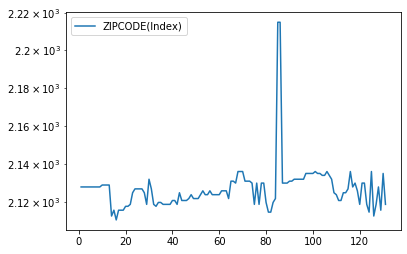

In [9]:
ax = plt.plot(data.index, data.ZIPCODE, label = 'ZIPCODE(Index)')
plt.legend()
plt.yscale('log')

## Построить несколько суб-графиков на одном графике используя .subplot.
### Построим график с 2 подграфиками. 1 подграфик показывает зависимость колонки index от колонки Y. " подграфик показывает зависимость index от X.

Text(0.5, 1.0, 'X(index)')

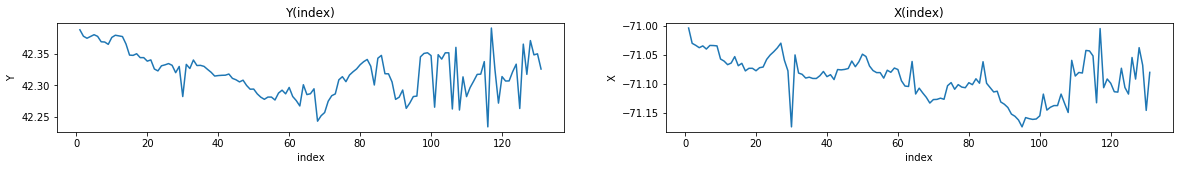

In [10]:
plt.figure(figsize = (20, 2))
plt.subplot(1, 2, 1)
plt.plot(data.index, data.Y)
plt.xlabel('index')
plt.ylabel('Y')
plt.title('Y(index)')
plt.subplot(1, 2, 2)
plt.plot(data.index, data.X)
plt.xlabel('index')
plt.ylabel('X')
plt.title('X(index)')

# На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть хоба варианта нужно продемонстрировать.

### Построим график для DataFrame.

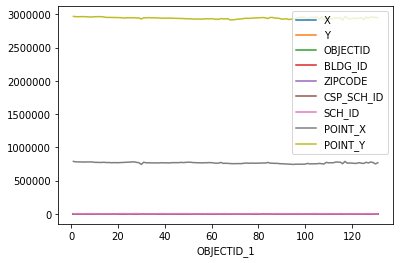

In [18]:
data.plot()

### Построим box график для колонки X и покажем зависимоть колонки от CITY.

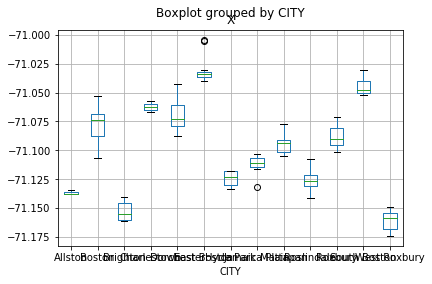

In [19]:
data.boxplot(column = 'X', by = 'CITY')

### Построим гистограмму для колонки Y.

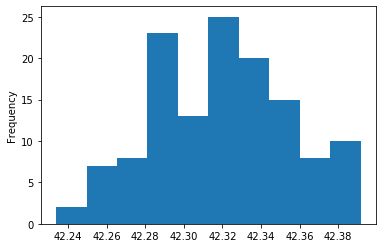

In [20]:
data.Y.plot.hist()

# Seaborn

## Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

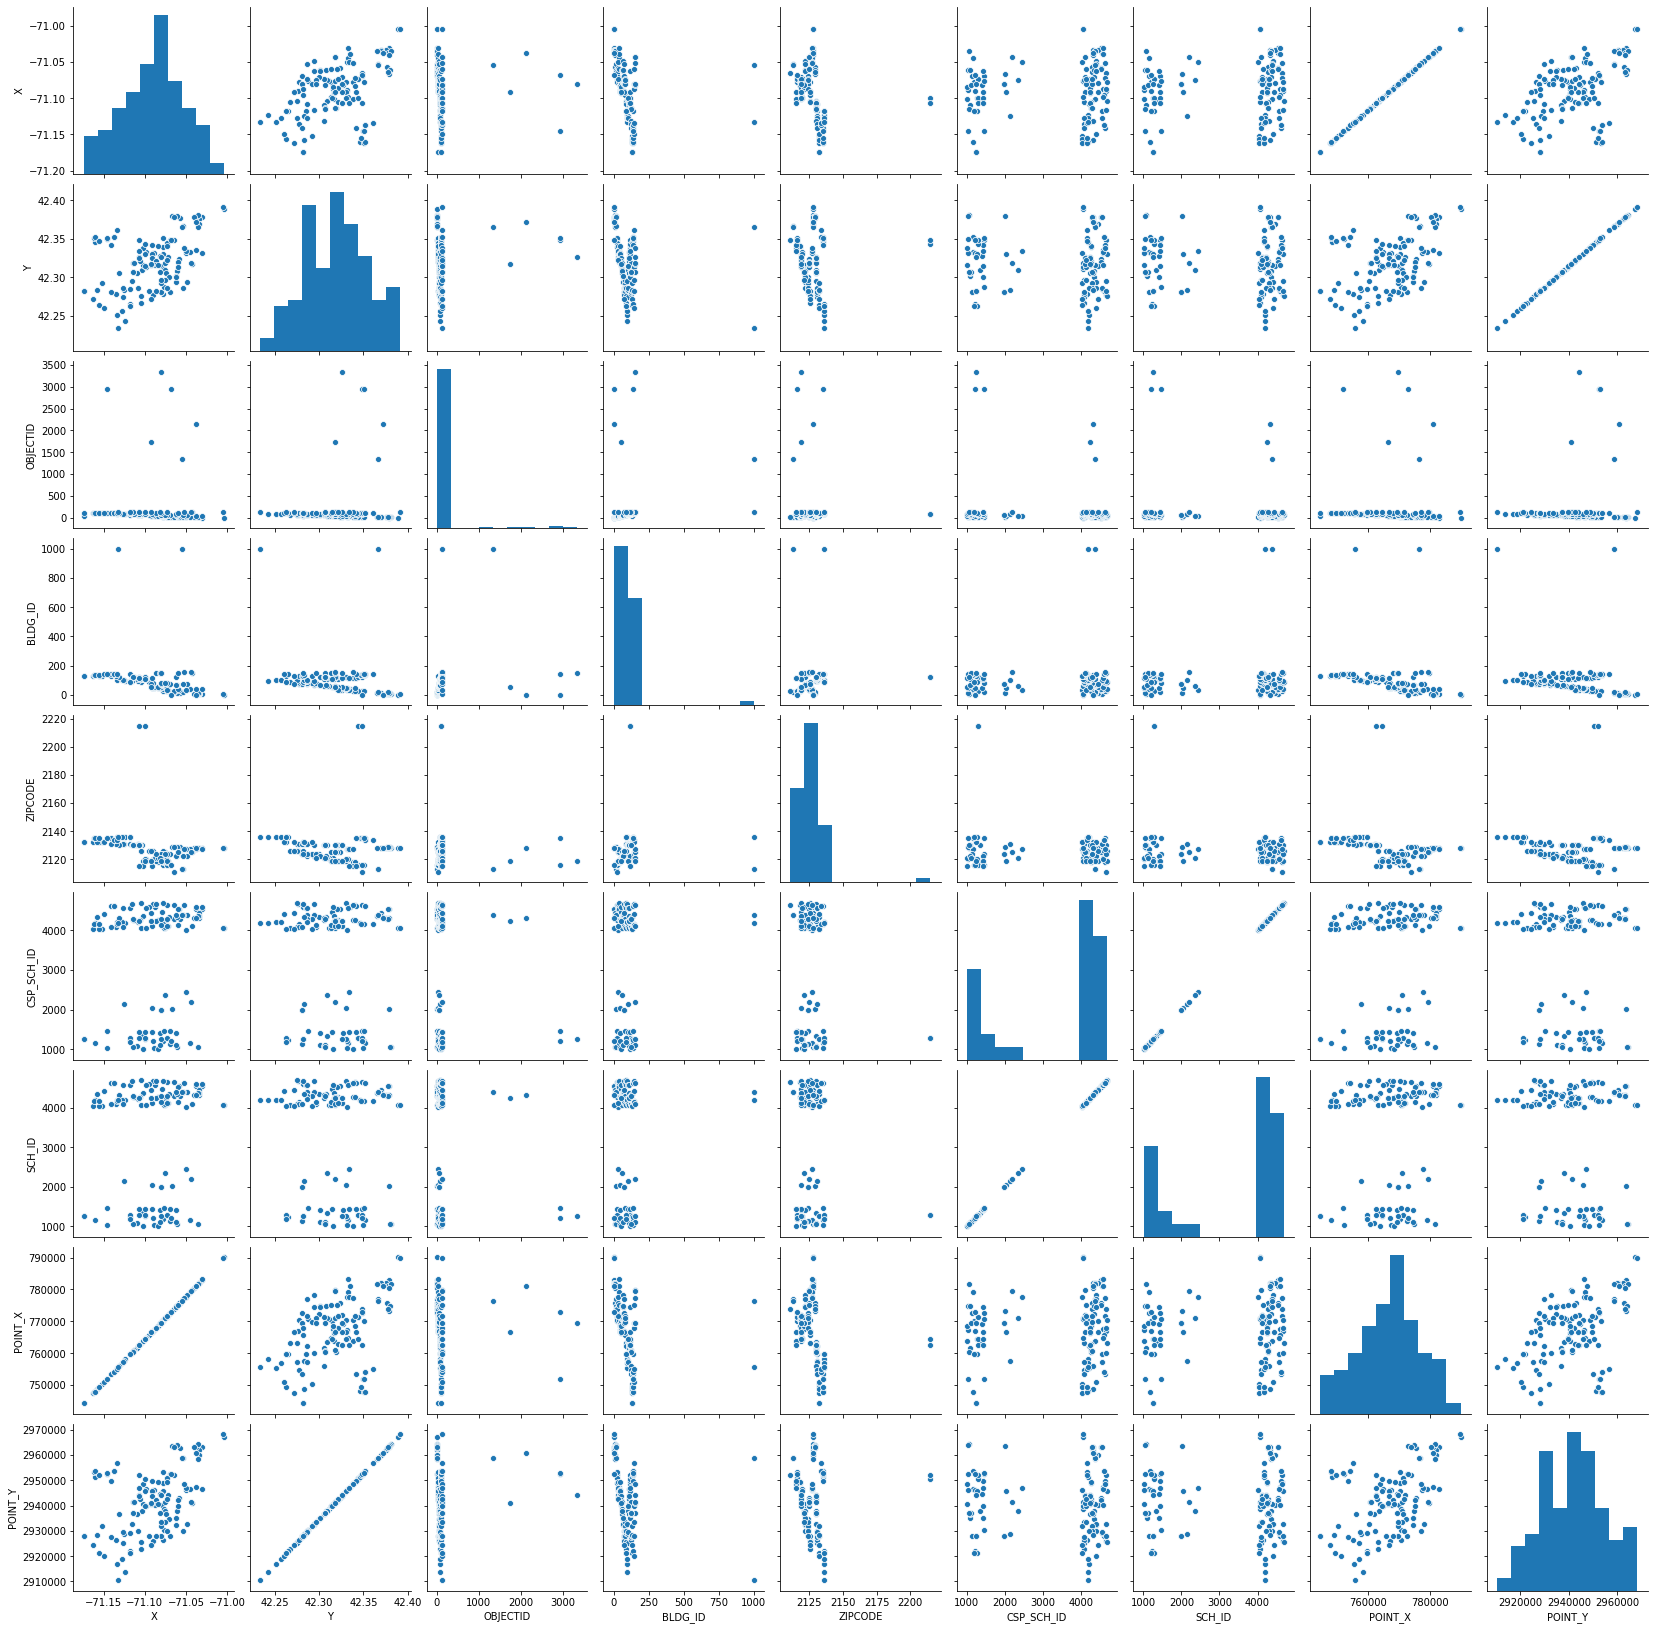

In [14]:
sns.pairplot(data)

## Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

### Построим график для колонок X и Y. 

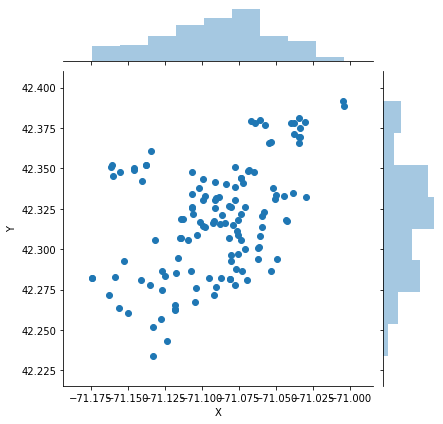

In [15]:
sns.jointplot(data.X, data.Y)

## Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального
### Построим boxplot для колонок X и CITY.

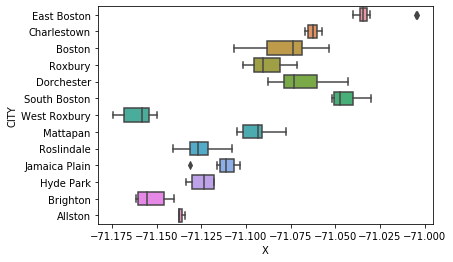

In [21]:
sns.boxplot(data.X, data.CITY)

## Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика!)

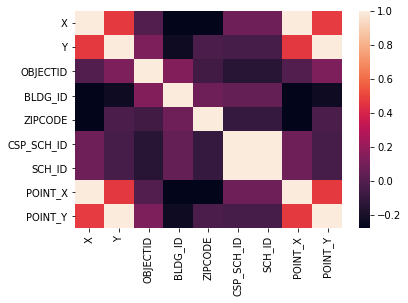

In [22]:
c = data.select_dtypes(['number']).corr()
sns.heatmap(c)

## Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению
### Построим QQ-график для колонки X.

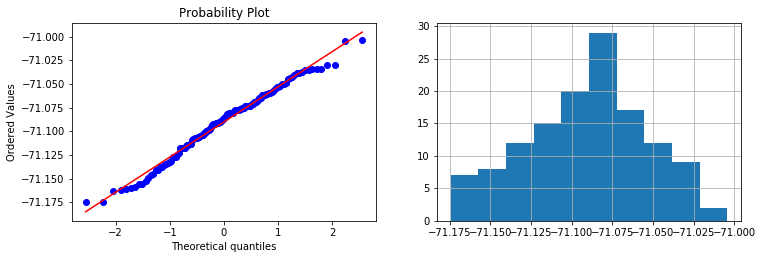

In [23]:
pylab.figure(figsize = (12, 8))
pylab.subplot(2, 2, 1)
stats.probplot(data.X, dist = 'norm', plot = pylab)
pylab.subplot(2, 2, 2)
data.X.hist()

## Построить любой график (связанный с вашими данными!) с помощью plotly
### Построим гистограмму для колонок CITY и X.

In [25]:
g_o = [py.graph_objs.Bar(x = data.CITY, y = data.X)]
py.offline.iplot(g_o)